## Task 01: Predicting the Percentage of student based on the study hours

In [2]:
#for Scraping student data from websites
import requests
import urllib.request
from bs4 import BeautifulSoup

#for manipulation of data
import numpy as np
import pandas as pd

#for graphs and chart
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#dataset is on this link
# dataset contain hours and marks on its corresponding 
base_url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [4]:
#requesting to the website
res = requests.get(base_url)

#code 200 means successfull
print(res.status_code)

<Response [200]>
200


In [5]:
#calling beautiful soup from bs4
#BeautifulSoup is a constructor
soup = BeautifulSoup(res.content, "html.parser")
# print(soup)

Hours,Scores
2.5,21
5.1,47
3.2,27
8.5,75
3.5,30
1.5,20
9.2,88
5.5,60
8.3,81
2.7,25
7.7,85
5.9,62
4.5,41
3.3,42
1.1,17
8.9,95
2.5,30
1.9,24
6.1,67
7.4,69
2.7,30
4.8,54
3.8,35
6.9,76
7.8,86


In [34]:
#Saving the data in csv
with open('marks.csv', 'w') as file:
    for line in soup:
        file.write(line)
        
file.close()

In [7]:
#reading data from file
dataset = pd.read_csv('marks.csv')
dataset.shape

(25, 2)

In [8]:
#describing the data
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
#To show what data contain
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
#information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
#X is a hours
#y is a marks - targeted variable
X = dataset.iloc[:,:1].values
y = dataset.iloc[:,1].values

In [12]:
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

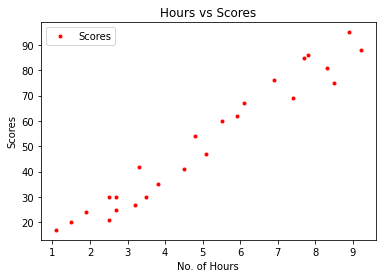

In [35]:
#ploting the linear hours and marks
dataset.plot(x = "Hours", y = "Scores",style='.',color = "red")
plt.title("Hours vs Scores")
plt.xlabel("No. of Hours")
plt.ylabel('Scores')
plt.show()

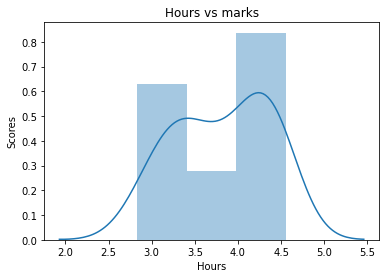

In [14]:
#Skewness to represent No of scores
plt.title("Hours vs marks")
sns.distplot(np.log(y))
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

Text(0.5, 1.0, 'Regression Plot')

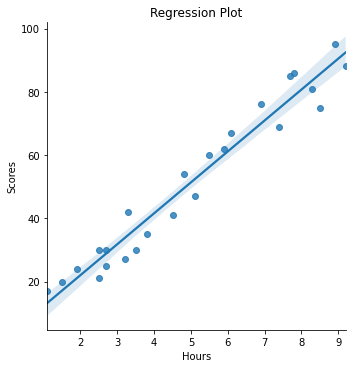

In [33]:
#ploting linear regession line with the help of seaborn
sns.lmplot(x='Hours', y = 'Scores',data=dataset)
plt.title("Regression Plot")

In [16]:
#splitting the data in train and test
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [24]:
#import linear regression and mean absolute error from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

percentage_model = LinearRegression()
percentage_model.fit(train_X, train_y)

LinearRegression()

In [25]:
val_y

array([17, 42, 24, 75, 54, 85, 67], dtype=int64)

In [26]:
val_X

array([[1.1],
       [3.3],
       [1.9],
       [8.5],
       [4.8],
       [7.7],
       [6.1]])

Predicting the model

In [40]:
percentage_model_preds = percentage_model.predict(val_X).round(3)
val_mae = mean_absolute_error(percentage_model_preds, val_y).round(3)

In [41]:
print("Mean Absolute Error of Linear Regression", val_mae.round(3))

Mean Absolute Error of Linear Regression 7.332


Evaluation of Model
Perdicting the Model

In [42]:
hours = [[9.25]]
pred_percentage = percentage_model.predict(hours)[0].round(3)
print("Student percentage is {} if a student study {} Hours/day".format(pred_percentage,hours[0][0]))

Student percentage is 93.83 if a student study 9.25 Hours/day


<BarContainer object of 1 artists>

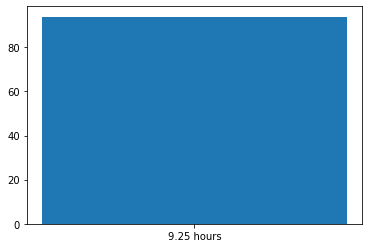

In [39]:
percentage_histogram = plt.figure()
plt.bar("9.25 hours",pred_percentage)